# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
!pip install -U tensorflow==1.1 #MP To remove Tensorflow errors from using version 1.3
#!pip uninstall matplotlib
!pip install -U matplotlib==2.0.2 #MP To solve error prob: AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Requirement already up-to-date: tensorflow==1.1 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages
Requirement already up-to-date: six>=1.10.0 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: numpy>=1.11.0 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: werkzeug>=0.11.10 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: protobuf>=3.2.0 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: wheel>=0.26 in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from tensorflow==1.1)
Requirement already up-to-date: setuptools in /home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages (from protobuf>=3.2.0->tensorflow==1.1)
Requirement already up-to-date: matplot

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

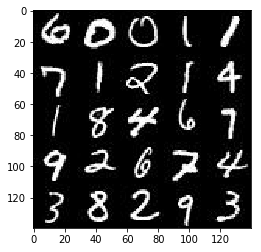

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

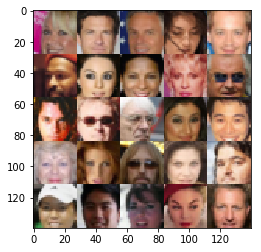

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/home/michael/anaconda3/envs/face-gen/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    #1-8 TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learn_rate = tf.placeholder(tf.float32, name='learn_rate')
    return inputs_real, inputs_z, learn_rate
 
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    #2-1 TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        j1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        j1 = tf.maximum(alpha * j1, j1)
        
        j2 = tf.layers.conv2d(j1, 128, 5, 2, 'same')
        j2 = tf.layers.batch_normalization(j2, training=True)
        j2 = tf.maximum(alpha * j2, j2)
        
        j3 = tf.layers.conv2d(j2, 256, 5, 2, 'same')
        j3 = tf.layers.batch_normalization(j3, training=True)
        j3 = tf.maximum(alpha * j3, j3)
        
        flat = tf.reshape(j3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    #3-8 TODO: Implement Function
    
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2    
        # first fcl
        x1 = tf.layers.dense(z, 2*2*512)
        # reshape
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        # x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 16x16x256
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # OutputL
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 32x32x3 now
        
        #logits = tf.slice(logits, [0, 2, 2, 0], [-1, 28, 28, -1])
        out = tf.tanh(logits)
        
        return out

       
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    #4 TODO: Implement Function MP4-10
    
    # Implement Function
    label_smoothness = 0.1
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-label_smoothness)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    #5-3 TODO: Implement Function

    # TODO: Implement Function

    # Get discriminator and gen variables
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Run optimizer
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    #6-9 TODO: Build Model
    
    # Build Model
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 0.4657... Generator Loss: 2.8690
Epoch 0/2... Discriminator Loss: 0.4761... Generator Loss: 3.5858
Epoch 0/2... Discriminator Loss: 0.6768... Generator Loss: 1.3828
Epoch 0/2... Discriminator Loss: 0.7523... Generator Loss: 9.5967


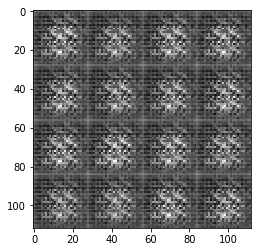

Epoch 0/2... Discriminator Loss: 0.8181... Generator Loss: 3.8726
Epoch 0/2... Discriminator Loss: 0.5298... Generator Loss: 6.2897
Epoch 0/2... Discriminator Loss: 0.4687... Generator Loss: 5.7001
Epoch 0/2... Discriminator Loss: 0.4507... Generator Loss: 3.2591
Epoch 0/2... Discriminator Loss: 0.7310... Generator Loss: 1.6905


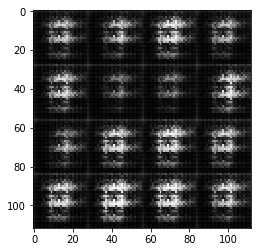

Epoch 0/2... Discriminator Loss: 0.5515... Generator Loss: 2.2648
Epoch 0/2... Discriminator Loss: 0.7369... Generator Loss: 4.0245
Epoch 0/2... Discriminator Loss: 0.4752... Generator Loss: 2.8750
Epoch 0/2... Discriminator Loss: 0.4132... Generator Loss: 3.8266
Epoch 0/2... Discriminator Loss: 0.4446... Generator Loss: 3.2295


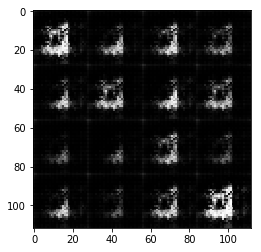

Epoch 0/2... Discriminator Loss: 0.4708... Generator Loss: 2.9716
Epoch 0/2... Discriminator Loss: 0.4150... Generator Loss: 3.2902
Epoch 0/2... Discriminator Loss: 0.4426... Generator Loss: 3.6235
Epoch 0/2... Discriminator Loss: 0.4738... Generator Loss: 7.0172
Epoch 0/2... Discriminator Loss: 0.5176... Generator Loss: 2.4649


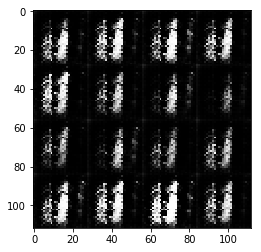

Epoch 0/2... Discriminator Loss: 0.4225... Generator Loss: 3.1962
Epoch 0/2... Discriminator Loss: 0.4634... Generator Loss: 3.0753
Epoch 0/2... Discriminator Loss: 0.4420... Generator Loss: 3.0624
Epoch 0/2... Discriminator Loss: 0.4405... Generator Loss: 2.9507
Epoch 0/2... Discriminator Loss: 0.4724... Generator Loss: 4.1722


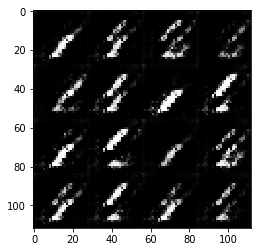

Epoch 0/2... Discriminator Loss: 0.4620... Generator Loss: 3.2149
Epoch 0/2... Discriminator Loss: 0.4149... Generator Loss: 3.8689
Epoch 0/2... Discriminator Loss: 0.4967... Generator Loss: 2.6834
Epoch 0/2... Discriminator Loss: 0.4618... Generator Loss: 2.8475
Epoch 0/2... Discriminator Loss: 0.5505... Generator Loss: 2.1441


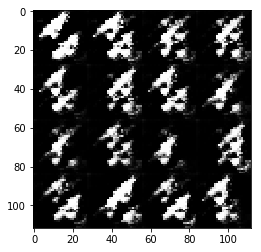

Epoch 0/2... Discriminator Loss: 0.4257... Generator Loss: 3.5460
Epoch 0/2... Discriminator Loss: 0.5018... Generator Loss: 2.2729
Epoch 0/2... Discriminator Loss: 0.5070... Generator Loss: 2.3810
Epoch 0/2... Discriminator Loss: 0.6127... Generator Loss: 5.8421
Epoch 0/2... Discriminator Loss: 0.6068... Generator Loss: 4.9775


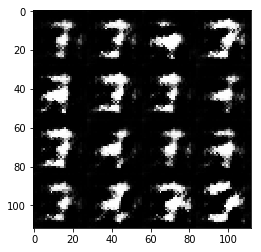

Epoch 0/2... Discriminator Loss: 0.5233... Generator Loss: 2.2028
Epoch 0/2... Discriminator Loss: 0.4806... Generator Loss: 2.8921
Epoch 0/2... Discriminator Loss: 0.4310... Generator Loss: 4.1675
Epoch 0/2... Discriminator Loss: 0.4172... Generator Loss: 3.9472
Epoch 0/2... Discriminator Loss: 0.5191... Generator Loss: 4.5829


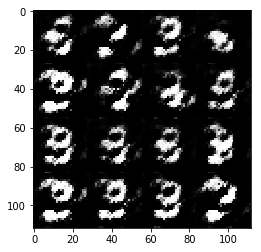

Epoch 0/2... Discriminator Loss: 0.4297... Generator Loss: 4.3972
Epoch 0/2... Discriminator Loss: 0.4225... Generator Loss: 3.3700
Epoch 0/2... Discriminator Loss: 0.4886... Generator Loss: 2.6590
Epoch 0/2... Discriminator Loss: 0.4714... Generator Loss: 2.6663
Epoch 0/2... Discriminator Loss: 0.5816... Generator Loss: 3.3949


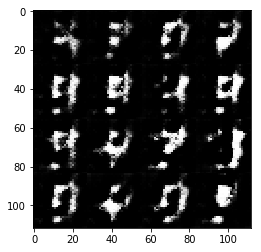

Epoch 0/2... Discriminator Loss: 0.6624... Generator Loss: 2.0736
Epoch 0/2... Discriminator Loss: 0.5780... Generator Loss: 2.1965
Epoch 0/2... Discriminator Loss: 0.4856... Generator Loss: 2.8438
Epoch 0/2... Discriminator Loss: 0.9539... Generator Loss: 1.1172
Epoch 0/2... Discriminator Loss: 0.5361... Generator Loss: 2.5801


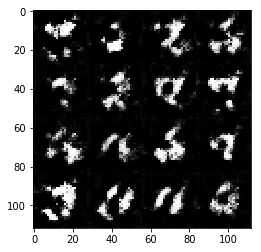

Epoch 0/2... Discriminator Loss: 0.5361... Generator Loss: 2.8998
Epoch 0/2... Discriminator Loss: 0.6217... Generator Loss: 2.0176
Epoch 0/2... Discriminator Loss: 0.5333... Generator Loss: 2.4610
Epoch 0/2... Discriminator Loss: 0.5803... Generator Loss: 1.9407
Epoch 0/2... Discriminator Loss: 0.5091... Generator Loss: 2.8851


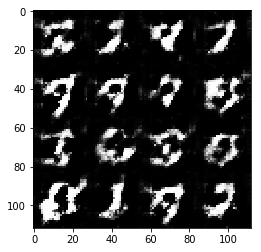

Epoch 0/2... Discriminator Loss: 0.7430... Generator Loss: 1.4781
Epoch 0/2... Discriminator Loss: 0.7586... Generator Loss: 1.5033
Epoch 0/2... Discriminator Loss: 0.6111... Generator Loss: 2.5439
Epoch 0/2... Discriminator Loss: 0.8225... Generator Loss: 1.4478
Epoch 0/2... Discriminator Loss: 0.6774... Generator Loss: 2.0897


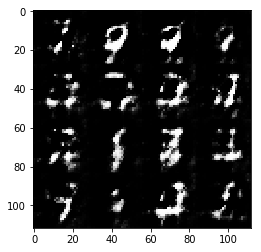

Epoch 0/2... Discriminator Loss: 0.6303... Generator Loss: 1.9560
Epoch 0/2... Discriminator Loss: 0.7960... Generator Loss: 1.5229
Epoch 0/2... Discriminator Loss: 0.7905... Generator Loss: 1.3925
Epoch 0/2... Discriminator Loss: 0.6274... Generator Loss: 2.3216
Epoch 0/2... Discriminator Loss: 0.6061... Generator Loss: 1.9879


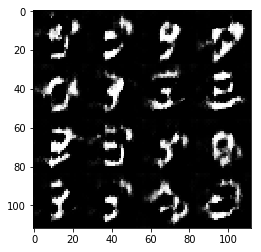

Epoch 0/2... Discriminator Loss: 0.5714... Generator Loss: 2.1504
Epoch 0/2... Discriminator Loss: 0.5831... Generator Loss: 2.5316
Epoch 0/2... Discriminator Loss: 0.5695... Generator Loss: 2.7148
Epoch 0/2... Discriminator Loss: 0.7817... Generator Loss: 1.5236
Epoch 0/2... Discriminator Loss: 0.5296... Generator Loss: 2.6870


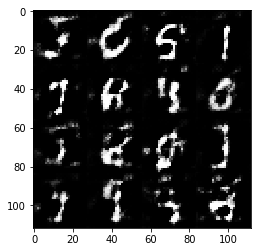

Epoch 0/2... Discriminator Loss: 0.7003... Generator Loss: 3.9338
Epoch 0/2... Discriminator Loss: 0.7275... Generator Loss: 3.3572
Epoch 0/2... Discriminator Loss: 0.8042... Generator Loss: 1.7870
Epoch 0/2... Discriminator Loss: 0.6802... Generator Loss: 1.8563
Epoch 0/2... Discriminator Loss: 0.6922... Generator Loss: 1.9623


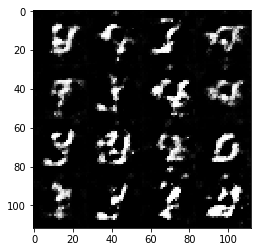

Epoch 0/2... Discriminator Loss: 0.6329... Generator Loss: 2.2427
Epoch 0/2... Discriminator Loss: 0.6639... Generator Loss: 1.9257
Epoch 0/2... Discriminator Loss: 0.9524... Generator Loss: 1.0133
Epoch 0/2... Discriminator Loss: 0.6802... Generator Loss: 1.7628
Epoch 0/2... Discriminator Loss: 0.7966... Generator Loss: 1.2961


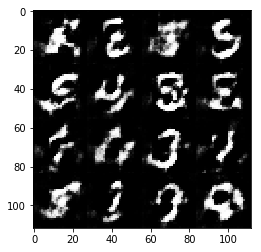

Epoch 0/2... Discriminator Loss: 0.9919... Generator Loss: 1.0137
Epoch 0/2... Discriminator Loss: 0.7724... Generator Loss: 1.4118
Epoch 0/2... Discriminator Loss: 0.7998... Generator Loss: 1.4442
Epoch 0/2... Discriminator Loss: 0.7383... Generator Loss: 2.4903
Epoch 0/2... Discriminator Loss: 0.7812... Generator Loss: 1.4645


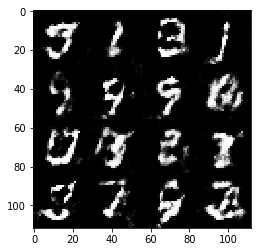

Epoch 0/2... Discriminator Loss: 0.8709... Generator Loss: 1.2126
Epoch 0/2... Discriminator Loss: 0.6961... Generator Loss: 1.9031
Epoch 0/2... Discriminator Loss: 0.6795... Generator Loss: 2.0206
Epoch 0/2... Discriminator Loss: 0.7969... Generator Loss: 1.7984
Epoch 0/2... Discriminator Loss: 0.6671... Generator Loss: 2.3254


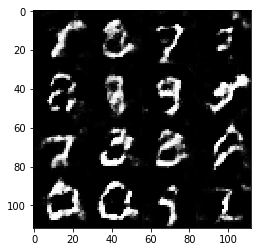

Epoch 0/2... Discriminator Loss: 0.8462... Generator Loss: 1.1460
Epoch 0/2... Discriminator Loss: 0.6121... Generator Loss: 2.1033
Epoch 0/2... Discriminator Loss: 1.0464... Generator Loss: 0.9609
Epoch 0/2... Discriminator Loss: 1.2877... Generator Loss: 0.6131
Epoch 1/2... Discriminator Loss: 0.8534... Generator Loss: 2.0075


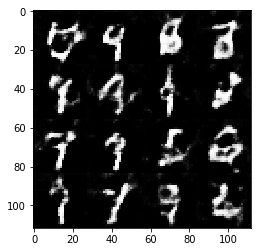

Epoch 1/2... Discriminator Loss: 0.7948... Generator Loss: 2.0668
Epoch 1/2... Discriminator Loss: 0.6642... Generator Loss: 1.8449
Epoch 1/2... Discriminator Loss: 0.7685... Generator Loss: 1.6938
Epoch 1/2... Discriminator Loss: 0.8817... Generator Loss: 1.1717
Epoch 1/2... Discriminator Loss: 0.7644... Generator Loss: 1.5994


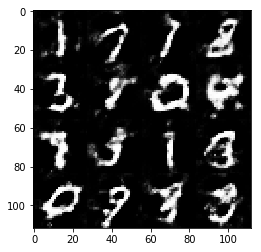

Epoch 1/2... Discriminator Loss: 0.8660... Generator Loss: 1.7175
Epoch 1/2... Discriminator Loss: 0.7933... Generator Loss: 1.4043
Epoch 1/2... Discriminator Loss: 0.7689... Generator Loss: 1.5913
Epoch 1/2... Discriminator Loss: 1.0158... Generator Loss: 1.0062
Epoch 1/2... Discriminator Loss: 1.2177... Generator Loss: 3.4656


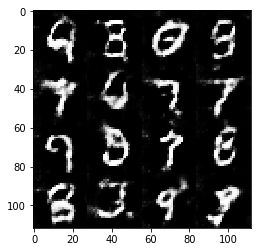

Epoch 1/2... Discriminator Loss: 1.1223... Generator Loss: 0.7978
Epoch 1/2... Discriminator Loss: 1.0736... Generator Loss: 0.7640
Epoch 1/2... Discriminator Loss: 0.9207... Generator Loss: 1.2952
Epoch 1/2... Discriminator Loss: 0.8487... Generator Loss: 1.8852
Epoch 1/2... Discriminator Loss: 0.7661... Generator Loss: 1.4679


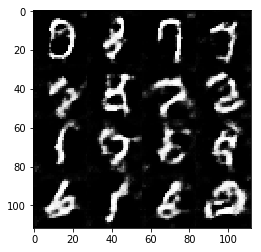

Epoch 1/2... Discriminator Loss: 0.8342... Generator Loss: 1.8810
Epoch 1/2... Discriminator Loss: 0.9110... Generator Loss: 1.1015
Epoch 1/2... Discriminator Loss: 0.8600... Generator Loss: 1.5981
Epoch 1/2... Discriminator Loss: 0.8822... Generator Loss: 1.7939
Epoch 1/2... Discriminator Loss: 0.8904... Generator Loss: 1.2265


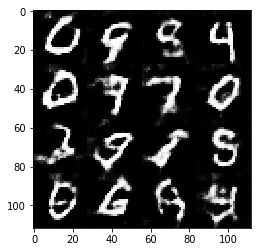

Epoch 1/2... Discriminator Loss: 1.3946... Generator Loss: 3.4060
Epoch 1/2... Discriminator Loss: 1.0520... Generator Loss: 0.8763
Epoch 1/2... Discriminator Loss: 0.7729... Generator Loss: 1.8633
Epoch 1/2... Discriminator Loss: 0.8118... Generator Loss: 1.5756
Epoch 1/2... Discriminator Loss: 1.0329... Generator Loss: 0.8447


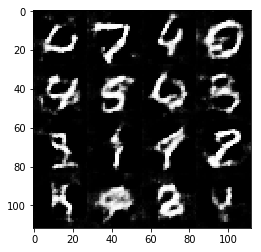

Epoch 1/2... Discriminator Loss: 0.8233... Generator Loss: 1.9429
Epoch 1/2... Discriminator Loss: 0.8157... Generator Loss: 1.8477
Epoch 1/2... Discriminator Loss: 0.9343... Generator Loss: 2.2425
Epoch 1/2... Discriminator Loss: 0.8738... Generator Loss: 1.5006
Epoch 1/2... Discriminator Loss: 0.7643... Generator Loss: 1.7516


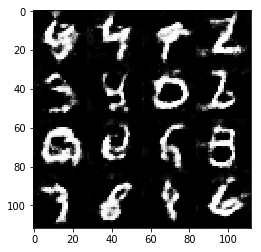

Epoch 1/2... Discriminator Loss: 0.8479... Generator Loss: 1.3088
Epoch 1/2... Discriminator Loss: 1.0337... Generator Loss: 0.8466
Epoch 1/2... Discriminator Loss: 1.4260... Generator Loss: 0.5044
Epoch 1/2... Discriminator Loss: 0.8515... Generator Loss: 1.4532
Epoch 1/2... Discriminator Loss: 0.8896... Generator Loss: 1.1668


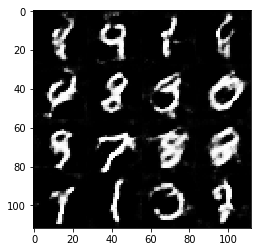

Epoch 1/2... Discriminator Loss: 1.0802... Generator Loss: 0.8034
Epoch 1/2... Discriminator Loss: 0.7546... Generator Loss: 1.4868
Epoch 1/2... Discriminator Loss: 0.8386... Generator Loss: 1.2706
Epoch 1/2... Discriminator Loss: 0.8957... Generator Loss: 1.7883
Epoch 1/2... Discriminator Loss: 0.8843... Generator Loss: 2.0469


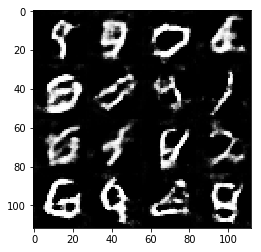

Epoch 1/2... Discriminator Loss: 0.8488... Generator Loss: 1.2939
Epoch 1/2... Discriminator Loss: 0.8174... Generator Loss: 1.3442
Epoch 1/2... Discriminator Loss: 0.9606... Generator Loss: 2.1363
Epoch 1/2... Discriminator Loss: 0.9207... Generator Loss: 1.0560
Epoch 1/2... Discriminator Loss: 1.0923... Generator Loss: 2.1864


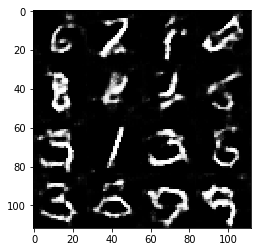

Epoch 1/2... Discriminator Loss: 0.8774... Generator Loss: 1.5869
Epoch 1/2... Discriminator Loss: 0.8961... Generator Loss: 1.4129
Epoch 1/2... Discriminator Loss: 1.4593... Generator Loss: 0.5591
Epoch 1/2... Discriminator Loss: 0.7860... Generator Loss: 1.7087
Epoch 1/2... Discriminator Loss: 0.7067... Generator Loss: 2.1910


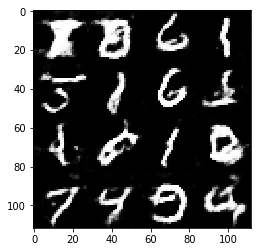

Epoch 1/2... Discriminator Loss: 1.0055... Generator Loss: 0.8776
Epoch 1/2... Discriminator Loss: 1.0689... Generator Loss: 0.8109
Epoch 1/2... Discriminator Loss: 0.8692... Generator Loss: 1.3432
Epoch 1/2... Discriminator Loss: 0.8550... Generator Loss: 1.2272
Epoch 1/2... Discriminator Loss: 1.0629... Generator Loss: 2.3826


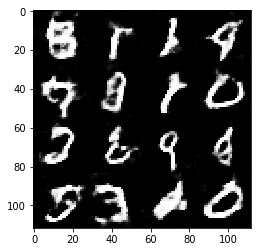

Epoch 1/2... Discriminator Loss: 1.2200... Generator Loss: 0.7053
Epoch 1/2... Discriminator Loss: 0.7998... Generator Loss: 1.8805
Epoch 1/2... Discriminator Loss: 0.9113... Generator Loss: 1.9727
Epoch 1/2... Discriminator Loss: 0.8066... Generator Loss: 1.4370
Epoch 1/2... Discriminator Loss: 0.7836... Generator Loss: 1.4423


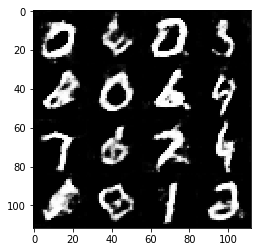

Epoch 1/2... Discriminator Loss: 0.8549... Generator Loss: 1.1073
Epoch 1/2... Discriminator Loss: 0.8447... Generator Loss: 1.9208
Epoch 1/2... Discriminator Loss: 0.8195... Generator Loss: 1.8731
Epoch 1/2... Discriminator Loss: 0.8025... Generator Loss: 1.4948
Epoch 1/2... Discriminator Loss: 0.8271... Generator Loss: 1.1163


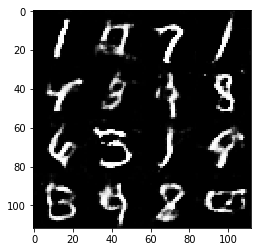

Epoch 1/2... Discriminator Loss: 1.2573... Generator Loss: 0.6651
Epoch 1/2... Discriminator Loss: 0.6777... Generator Loss: 1.7477
Epoch 1/2... Discriminator Loss: 0.7421... Generator Loss: 1.5772
Epoch 1/2... Discriminator Loss: 0.8287... Generator Loss: 1.4217
Epoch 1/2... Discriminator Loss: 0.8479... Generator Loss: 1.2510


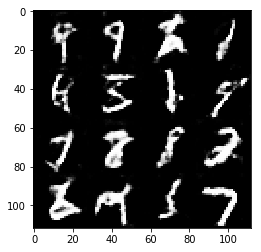

Epoch 1/2... Discriminator Loss: 0.7027... Generator Loss: 1.7210
Epoch 1/2... Discriminator Loss: 0.7793... Generator Loss: 1.2097
Epoch 1/2... Discriminator Loss: 0.7864... Generator Loss: 1.2136
Epoch 1/2... Discriminator Loss: 0.7798... Generator Loss: 1.6598
Epoch 1/2... Discriminator Loss: 0.8788... Generator Loss: 1.0351


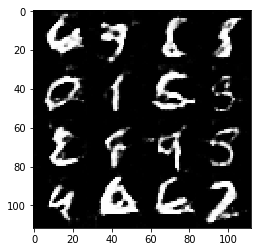

Epoch 1/2... Discriminator Loss: 0.7051... Generator Loss: 1.3612
Epoch 1/2... Discriminator Loss: 0.7296... Generator Loss: 1.4837
Epoch 1/2... Discriminator Loss: 1.1483... Generator Loss: 0.7022
Epoch 1/2... Discriminator Loss: 0.9885... Generator Loss: 1.2188
Epoch 1/2... Discriminator Loss: 0.8132... Generator Loss: 1.2468


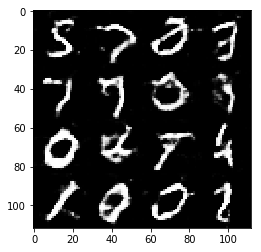

Epoch 1/2... Discriminator Loss: 0.9172... Generator Loss: 0.9707
Epoch 1/2... Discriminator Loss: 0.7187... Generator Loss: 1.8748
Epoch 1/2... Discriminator Loss: 0.7207... Generator Loss: 1.4036
Epoch 1/2... Discriminator Loss: 0.6774... Generator Loss: 1.4948
Epoch 1/2... Discriminator Loss: 0.7613... Generator Loss: 1.2781


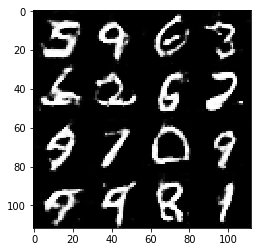

Epoch 1/2... Discriminator Loss: 0.6574... Generator Loss: 1.7008
Epoch 1/2... Discriminator Loss: 0.7924... Generator Loss: 1.2112
Epoch 1/2... Discriminator Loss: 1.3120... Generator Loss: 0.6420
Epoch 1/2... Discriminator Loss: 0.8868... Generator Loss: 1.0170
Epoch 1/2... Discriminator Loss: 0.7703... Generator Loss: 1.5489


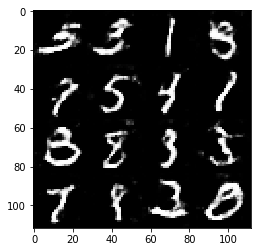

Epoch 1/2... Discriminator Loss: 0.8046... Generator Loss: 1.1954
Epoch 1/2... Discriminator Loss: 0.7098... Generator Loss: 1.8062
Epoch 1/2... Discriminator Loss: 1.1024... Generator Loss: 2.8555


In [13]:
batch_size = 64
z_dim = 128
learning_rate = 0.0002     #Tried 0.001 previously, quality was not great.
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 0.9276... Generator Loss: 1.2209
Epoch 0/1... Discriminator Loss: 0.4949... Generator Loss: 6.8151
Epoch 0/1... Discriminator Loss: 0.4448... Generator Loss: 5.9044
Epoch 0/1... Discriminator Loss: 0.5851... Generator Loss: 1.9186


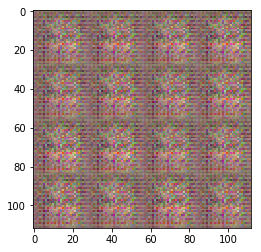

Epoch 0/1... Discriminator Loss: 0.4708... Generator Loss: 3.0182
Epoch 0/1... Discriminator Loss: 0.4231... Generator Loss: 3.1440
Epoch 0/1... Discriminator Loss: 0.5683... Generator Loss: 1.8572
Epoch 0/1... Discriminator Loss: 1.0373... Generator Loss: 0.8901
Epoch 0/1... Discriminator Loss: 0.8316... Generator Loss: 9.6346


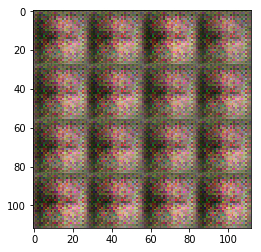

Epoch 0/1... Discriminator Loss: 0.5608... Generator Loss: 2.3148
Epoch 0/1... Discriminator Loss: 0.8244... Generator Loss: 1.0403
Epoch 0/1... Discriminator Loss: 0.6297... Generator Loss: 1.7128
Epoch 0/1... Discriminator Loss: 0.4048... Generator Loss: 3.4115
Epoch 0/1... Discriminator Loss: 0.4608... Generator Loss: 2.4753


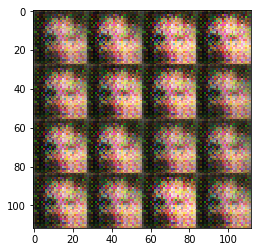

Epoch 0/1... Discriminator Loss: 0.4486... Generator Loss: 3.0062
Epoch 0/1... Discriminator Loss: 0.4314... Generator Loss: 3.5811
Epoch 0/1... Discriminator Loss: 0.4502... Generator Loss: 3.4258
Epoch 0/1... Discriminator Loss: 0.4089... Generator Loss: 3.5040
Epoch 0/1... Discriminator Loss: 0.4078... Generator Loss: 3.2311


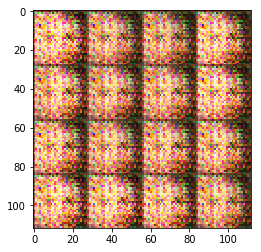

Epoch 0/1... Discriminator Loss: 0.4140... Generator Loss: 3.3066
Epoch 0/1... Discriminator Loss: 0.4246... Generator Loss: 3.4508
Epoch 0/1... Discriminator Loss: 0.6239... Generator Loss: 3.3090
Epoch 0/1... Discriminator Loss: 0.7356... Generator Loss: 1.9746
Epoch 0/1... Discriminator Loss: 0.9480... Generator Loss: 2.1584


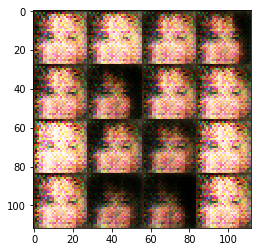

Epoch 0/1... Discriminator Loss: 0.5719... Generator Loss: 2.7535
Epoch 0/1... Discriminator Loss: 0.6777... Generator Loss: 1.4946
Epoch 0/1... Discriminator Loss: 0.6406... Generator Loss: 3.8444
Epoch 0/1... Discriminator Loss: 0.9057... Generator Loss: 1.1967
Epoch 0/1... Discriminator Loss: 0.8999... Generator Loss: 1.2491


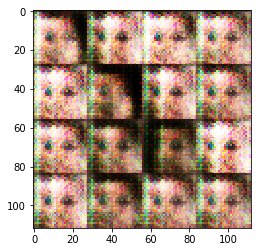

Epoch 0/1... Discriminator Loss: 0.7637... Generator Loss: 1.3784
Epoch 0/1... Discriminator Loss: 1.0918... Generator Loss: 4.5120
Epoch 0/1... Discriminator Loss: 0.6873... Generator Loss: 2.6818
Epoch 0/1... Discriminator Loss: 1.0437... Generator Loss: 1.0783
Epoch 0/1... Discriminator Loss: 0.9044... Generator Loss: 1.3847


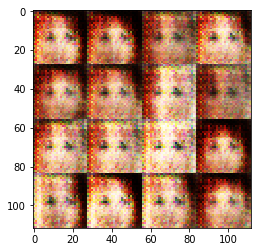

Epoch 0/1... Discriminator Loss: 0.9451... Generator Loss: 1.5530
Epoch 0/1... Discriminator Loss: 0.9054... Generator Loss: 1.4855
Epoch 0/1... Discriminator Loss: 1.1274... Generator Loss: 2.0299
Epoch 0/1... Discriminator Loss: 1.0255... Generator Loss: 1.5160
Epoch 0/1... Discriminator Loss: 0.9662... Generator Loss: 1.9455


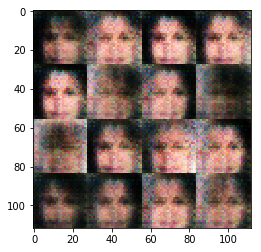

Epoch 0/1... Discriminator Loss: 1.3415... Generator Loss: 0.5717
Epoch 0/1... Discriminator Loss: 0.9925... Generator Loss: 1.1083
Epoch 0/1... Discriminator Loss: 0.9674... Generator Loss: 1.1849
Epoch 0/1... Discriminator Loss: 0.7226... Generator Loss: 1.8623
Epoch 0/1... Discriminator Loss: 0.9252... Generator Loss: 1.3126


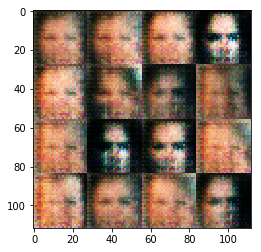

Epoch 0/1... Discriminator Loss: 1.2130... Generator Loss: 3.6962
Epoch 0/1... Discriminator Loss: 0.9904... Generator Loss: 1.4663
Epoch 0/1... Discriminator Loss: 0.8375... Generator Loss: 1.4116
Epoch 0/1... Discriminator Loss: 0.7961... Generator Loss: 1.6668
Epoch 0/1... Discriminator Loss: 1.1438... Generator Loss: 1.2713


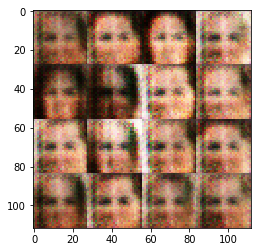

Epoch 0/1... Discriminator Loss: 0.8886... Generator Loss: 1.3171
Epoch 0/1... Discriminator Loss: 1.5975... Generator Loss: 2.5884
Epoch 0/1... Discriminator Loss: 1.4264... Generator Loss: 0.7428
Epoch 0/1... Discriminator Loss: 0.8455... Generator Loss: 1.6953
Epoch 0/1... Discriminator Loss: 0.9926... Generator Loss: 1.3817


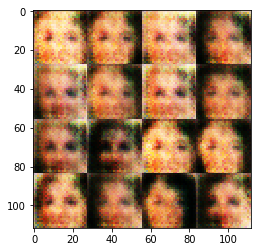

Epoch 0/1... Discriminator Loss: 0.7194... Generator Loss: 2.0135
Epoch 0/1... Discriminator Loss: 0.8238... Generator Loss: 1.3239
Epoch 0/1... Discriminator Loss: 0.9207... Generator Loss: 1.6267
Epoch 0/1... Discriminator Loss: 1.0230... Generator Loss: 1.7873
Epoch 0/1... Discriminator Loss: 0.9869... Generator Loss: 1.1546


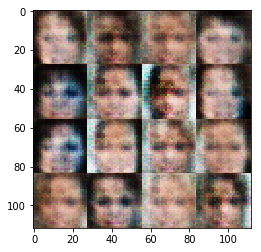

Epoch 0/1... Discriminator Loss: 0.9420... Generator Loss: 1.3982
Epoch 0/1... Discriminator Loss: 0.9292... Generator Loss: 1.0715
Epoch 0/1... Discriminator Loss: 1.0083... Generator Loss: 1.8989
Epoch 0/1... Discriminator Loss: 0.7904... Generator Loss: 1.4463
Epoch 0/1... Discriminator Loss: 0.9783... Generator Loss: 2.5396


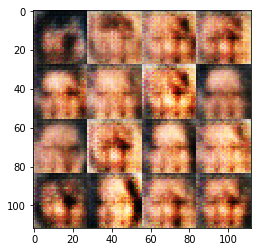

Epoch 0/1... Discriminator Loss: 1.1007... Generator Loss: 0.8099
Epoch 0/1... Discriminator Loss: 1.1077... Generator Loss: 0.9959
Epoch 0/1... Discriminator Loss: 0.9268... Generator Loss: 1.4355
Epoch 0/1... Discriminator Loss: 1.1443... Generator Loss: 1.4793
Epoch 0/1... Discriminator Loss: 1.4617... Generator Loss: 0.4958


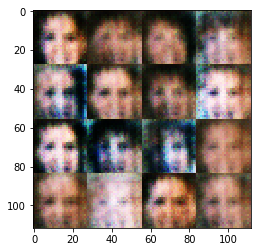

Epoch 0/1... Discriminator Loss: 1.0000... Generator Loss: 1.1499
Epoch 0/1... Discriminator Loss: 0.7615... Generator Loss: 1.6631
Epoch 0/1... Discriminator Loss: 0.9223... Generator Loss: 1.2048
Epoch 0/1... Discriminator Loss: 0.9247... Generator Loss: 1.4189
Epoch 0/1... Discriminator Loss: 0.7594... Generator Loss: 1.6729


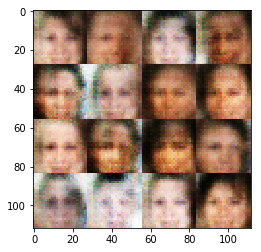

Epoch 0/1... Discriminator Loss: 0.9757... Generator Loss: 1.0283
Epoch 0/1... Discriminator Loss: 0.8888... Generator Loss: 1.7284
Epoch 0/1... Discriminator Loss: 0.8360... Generator Loss: 1.7809
Epoch 0/1... Discriminator Loss: 0.8530... Generator Loss: 1.6564
Epoch 0/1... Discriminator Loss: 0.9162... Generator Loss: 1.3448


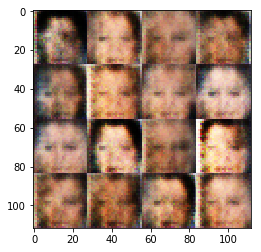

Epoch 0/1... Discriminator Loss: 0.7655... Generator Loss: 1.8565
Epoch 0/1... Discriminator Loss: 1.0169... Generator Loss: 1.0502
Epoch 0/1... Discriminator Loss: 0.9015... Generator Loss: 1.6787
Epoch 0/1... Discriminator Loss: 0.9561... Generator Loss: 1.3271
Epoch 0/1... Discriminator Loss: 1.1667... Generator Loss: 0.8726


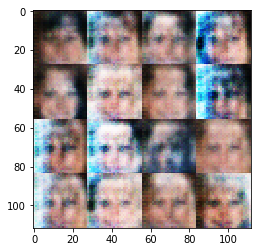

Epoch 0/1... Discriminator Loss: 1.0525... Generator Loss: 1.2888
Epoch 0/1... Discriminator Loss: 0.9377... Generator Loss: 1.2112
Epoch 0/1... Discriminator Loss: 0.9149... Generator Loss: 1.1961
Epoch 0/1... Discriminator Loss: 0.9907... Generator Loss: 1.1997
Epoch 0/1... Discriminator Loss: 1.1862... Generator Loss: 1.3685


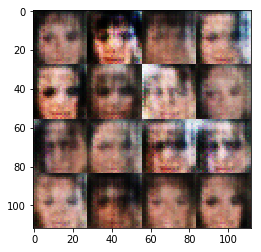

Epoch 0/1... Discriminator Loss: 1.2068... Generator Loss: 0.7759
Epoch 0/1... Discriminator Loss: 1.2874... Generator Loss: 1.0597
Epoch 0/1... Discriminator Loss: 0.9748... Generator Loss: 1.5495
Epoch 0/1... Discriminator Loss: 1.0016... Generator Loss: 1.7196
Epoch 0/1... Discriminator Loss: 1.1458... Generator Loss: 0.8480


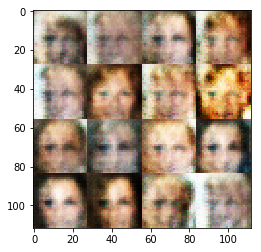

Epoch 0/1... Discriminator Loss: 0.9989... Generator Loss: 1.1513
Epoch 0/1... Discriminator Loss: 1.0301... Generator Loss: 1.5195
Epoch 0/1... Discriminator Loss: 1.0794... Generator Loss: 1.7780
Epoch 0/1... Discriminator Loss: 0.9900... Generator Loss: 1.4515
Epoch 0/1... Discriminator Loss: 0.8973... Generator Loss: 1.1501


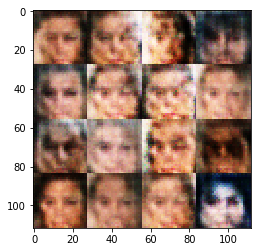

Epoch 0/1... Discriminator Loss: 1.0154... Generator Loss: 1.1577
Epoch 0/1... Discriminator Loss: 1.0956... Generator Loss: 1.0878
Epoch 0/1... Discriminator Loss: 1.1060... Generator Loss: 1.1611
Epoch 0/1... Discriminator Loss: 1.1506... Generator Loss: 1.1349
Epoch 0/1... Discriminator Loss: 0.9782... Generator Loss: 1.1870


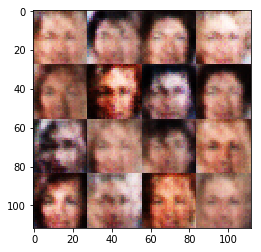

Epoch 0/1... Discriminator Loss: 1.1035... Generator Loss: 1.3750
Epoch 0/1... Discriminator Loss: 1.0101... Generator Loss: 1.0166
Epoch 0/1... Discriminator Loss: 1.0277... Generator Loss: 1.8283
Epoch 0/1... Discriminator Loss: 0.9067... Generator Loss: 1.7254
Epoch 0/1... Discriminator Loss: 1.0566... Generator Loss: 1.1999


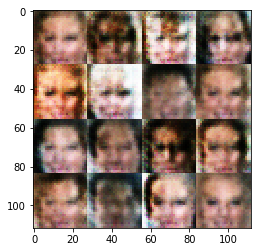

Epoch 0/1... Discriminator Loss: 0.8932... Generator Loss: 1.4959
Epoch 0/1... Discriminator Loss: 1.0245... Generator Loss: 1.2541
Epoch 0/1... Discriminator Loss: 1.4062... Generator Loss: 1.1047
Epoch 0/1... Discriminator Loss: 0.9904... Generator Loss: 1.9441
Epoch 0/1... Discriminator Loss: 1.0872... Generator Loss: 1.7506


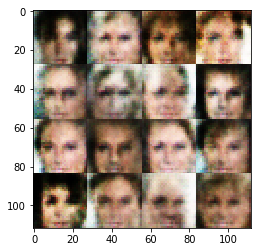

Epoch 0/1... Discriminator Loss: 0.9650... Generator Loss: 1.2322
Epoch 0/1... Discriminator Loss: 1.0809... Generator Loss: 1.3920
Epoch 0/1... Discriminator Loss: 0.9669... Generator Loss: 1.1070
Epoch 0/1... Discriminator Loss: 1.1919... Generator Loss: 0.9036
Epoch 0/1... Discriminator Loss: 1.0763... Generator Loss: 0.9302


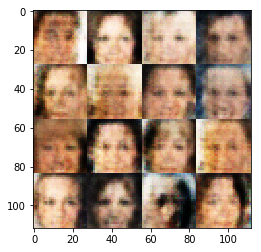

Epoch 0/1... Discriminator Loss: 1.3555... Generator Loss: 2.1171
Epoch 0/1... Discriminator Loss: 0.9929... Generator Loss: 1.4670
Epoch 0/1... Discriminator Loss: 0.9856... Generator Loss: 1.3642
Epoch 0/1... Discriminator Loss: 0.9768... Generator Loss: 1.6754
Epoch 0/1... Discriminator Loss: 0.8941... Generator Loss: 1.3712


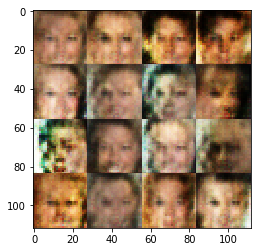

Epoch 0/1... Discriminator Loss: 0.9567... Generator Loss: 1.2830
Epoch 0/1... Discriminator Loss: 1.0943... Generator Loss: 0.7658
Epoch 0/1... Discriminator Loss: 1.1621... Generator Loss: 1.1426
Epoch 0/1... Discriminator Loss: 1.2243... Generator Loss: 0.7559
Epoch 0/1... Discriminator Loss: 1.0589... Generator Loss: 0.9786


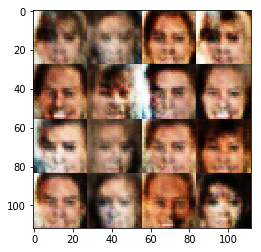

Epoch 0/1... Discriminator Loss: 1.1121... Generator Loss: 1.4529
Epoch 0/1... Discriminator Loss: 1.0010... Generator Loss: 1.0677
Epoch 0/1... Discriminator Loss: 0.9728... Generator Loss: 1.1477
Epoch 0/1... Discriminator Loss: 0.9262... Generator Loss: 1.0595
Epoch 0/1... Discriminator Loss: 1.1548... Generator Loss: 1.1662


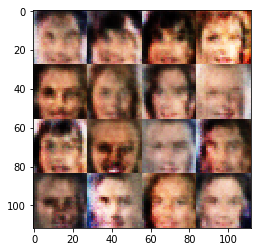

Epoch 0/1... Discriminator Loss: 1.0074... Generator Loss: 1.2233
Epoch 0/1... Discriminator Loss: 1.1117... Generator Loss: 1.6233
Epoch 0/1... Discriminator Loss: 1.1717... Generator Loss: 1.0690
Epoch 0/1... Discriminator Loss: 1.1045... Generator Loss: 0.9860
Epoch 0/1... Discriminator Loss: 1.0789... Generator Loss: 1.0651


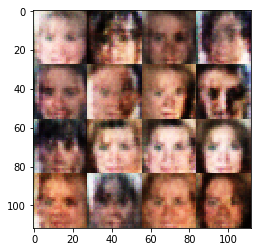

Epoch 0/1... Discriminator Loss: 1.2212... Generator Loss: 2.0486
Epoch 0/1... Discriminator Loss: 1.0826... Generator Loss: 1.6522
Epoch 0/1... Discriminator Loss: 1.0382... Generator Loss: 1.1136
Epoch 0/1... Discriminator Loss: 1.0620... Generator Loss: 1.0990
Epoch 0/1... Discriminator Loss: 1.0046... Generator Loss: 1.4576


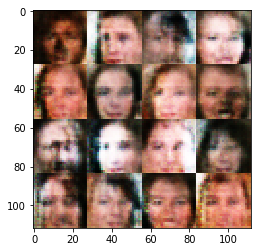

Epoch 0/1... Discriminator Loss: 1.1708... Generator Loss: 0.7493
Epoch 0/1... Discriminator Loss: 0.8920... Generator Loss: 2.0328
Epoch 0/1... Discriminator Loss: 1.0051... Generator Loss: 1.0096
Epoch 0/1... Discriminator Loss: 0.9340... Generator Loss: 1.5107
Epoch 0/1... Discriminator Loss: 1.0445... Generator Loss: 1.4037


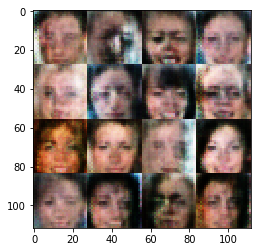

Epoch 0/1... Discriminator Loss: 0.8961... Generator Loss: 1.4103
Epoch 0/1... Discriminator Loss: 0.9900... Generator Loss: 1.2023
Epoch 0/1... Discriminator Loss: 1.0700... Generator Loss: 1.7582
Epoch 0/1... Discriminator Loss: 0.9720... Generator Loss: 1.4091
Epoch 0/1... Discriminator Loss: 0.9743... Generator Loss: 1.2798


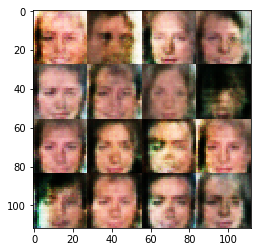

Epoch 0/1... Discriminator Loss: 0.9811... Generator Loss: 1.5810
Epoch 0/1... Discriminator Loss: 1.0257... Generator Loss: 1.1880
Epoch 0/1... Discriminator Loss: 1.0400... Generator Loss: 1.2545
Epoch 0/1... Discriminator Loss: 1.0047... Generator Loss: 1.3944
Epoch 0/1... Discriminator Loss: 1.0509... Generator Loss: 1.1639


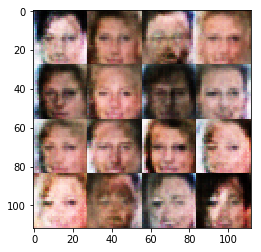

Epoch 0/1... Discriminator Loss: 0.9749... Generator Loss: 1.3607
Epoch 0/1... Discriminator Loss: 1.0468... Generator Loss: 1.3730
Epoch 0/1... Discriminator Loss: 1.1830... Generator Loss: 0.7256
Epoch 0/1... Discriminator Loss: 1.2084... Generator Loss: 1.1225
Epoch 0/1... Discriminator Loss: 0.9946... Generator Loss: 1.1353


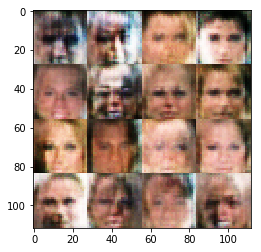

Epoch 0/1... Discriminator Loss: 0.8636... Generator Loss: 1.4186
Epoch 0/1... Discriminator Loss: 1.0261... Generator Loss: 1.2329
Epoch 0/1... Discriminator Loss: 1.0184... Generator Loss: 1.0035
Epoch 0/1... Discriminator Loss: 1.1825... Generator Loss: 1.0646
Epoch 0/1... Discriminator Loss: 0.9571... Generator Loss: 1.1938


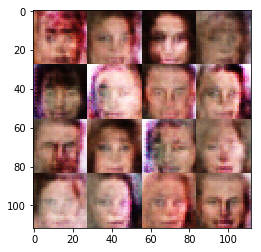

Epoch 0/1... Discriminator Loss: 0.9319... Generator Loss: 1.2986
Epoch 0/1... Discriminator Loss: 1.2860... Generator Loss: 0.8433
Epoch 0/1... Discriminator Loss: 0.9591... Generator Loss: 1.3613
Epoch 0/1... Discriminator Loss: 1.0240... Generator Loss: 1.0113
Epoch 0/1... Discriminator Loss: 1.0429... Generator Loss: 1.5343


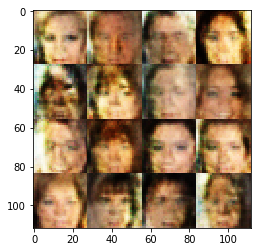

Epoch 0/1... Discriminator Loss: 1.1274... Generator Loss: 0.7855
Epoch 0/1... Discriminator Loss: 1.1877... Generator Loss: 0.8244
Epoch 0/1... Discriminator Loss: 1.1393... Generator Loss: 0.8645
Epoch 0/1... Discriminator Loss: 1.1252... Generator Loss: 0.9817
Epoch 0/1... Discriminator Loss: 1.0392... Generator Loss: 1.0989


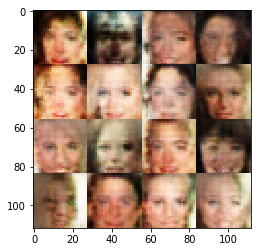

Epoch 0/1... Discriminator Loss: 1.1159... Generator Loss: 0.9453
Epoch 0/1... Discriminator Loss: 1.0342... Generator Loss: 0.9301
Epoch 0/1... Discriminator Loss: 0.9342... Generator Loss: 1.2230
Epoch 0/1... Discriminator Loss: 1.1290... Generator Loss: 0.9055
Epoch 0/1... Discriminator Loss: 1.1414... Generator Loss: 0.8082


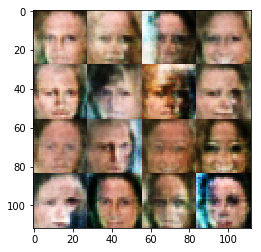

Epoch 0/1... Discriminator Loss: 0.8981... Generator Loss: 1.5524
Epoch 0/1... Discriminator Loss: 0.9634... Generator Loss: 1.4071
Epoch 0/1... Discriminator Loss: 1.2474... Generator Loss: 1.6521
Epoch 0/1... Discriminator Loss: 1.0358... Generator Loss: 1.4687
Epoch 0/1... Discriminator Loss: 0.9703... Generator Loss: 1.8035


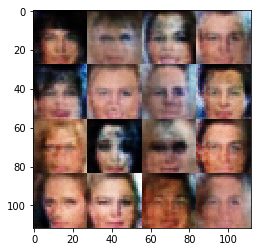

Epoch 0/1... Discriminator Loss: 1.0271... Generator Loss: 1.5122
Epoch 0/1... Discriminator Loss: 0.8045... Generator Loss: 1.4031
Epoch 0/1... Discriminator Loss: 1.0036... Generator Loss: 1.4558
Epoch 0/1... Discriminator Loss: 1.1882... Generator Loss: 0.6958
Epoch 0/1... Discriminator Loss: 0.9228... Generator Loss: 1.2703


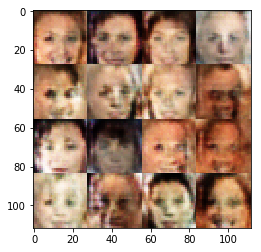

Epoch 0/1... Discriminator Loss: 0.8527... Generator Loss: 1.6332
Epoch 0/1... Discriminator Loss: 0.9231... Generator Loss: 1.0521
Epoch 0/1... Discriminator Loss: 1.1950... Generator Loss: 0.9011
Epoch 0/1... Discriminator Loss: 1.0301... Generator Loss: 1.4455
Epoch 0/1... Discriminator Loss: 0.9648... Generator Loss: 1.4423


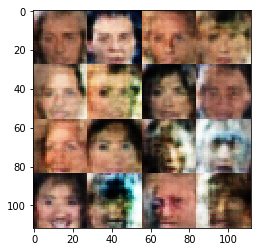

Epoch 0/1... Discriminator Loss: 1.1290... Generator Loss: 0.8064
Epoch 0/1... Discriminator Loss: 1.0849... Generator Loss: 0.8545
Epoch 0/1... Discriminator Loss: 1.1863... Generator Loss: 0.7840
Epoch 0/1... Discriminator Loss: 1.0698... Generator Loss: 2.1631
Epoch 0/1... Discriminator Loss: 1.1983... Generator Loss: 0.8138


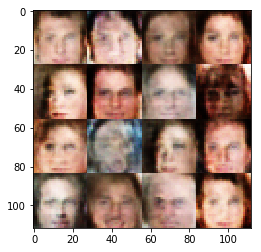

Epoch 0/1... Discriminator Loss: 1.0383... Generator Loss: 0.8919
Epoch 0/1... Discriminator Loss: 0.9402... Generator Loss: 1.6257
Epoch 0/1... Discriminator Loss: 1.0227... Generator Loss: 1.1023
Epoch 0/1... Discriminator Loss: 0.9451... Generator Loss: 1.3142
Epoch 0/1... Discriminator Loss: 1.0577... Generator Loss: 1.0348


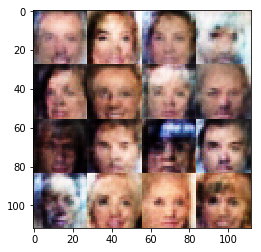

Epoch 0/1... Discriminator Loss: 0.9564... Generator Loss: 1.2083
Epoch 0/1... Discriminator Loss: 1.1579... Generator Loss: 0.7888
Epoch 0/1... Discriminator Loss: 1.0444... Generator Loss: 0.9230
Epoch 0/1... Discriminator Loss: 1.0944... Generator Loss: 1.2712
Epoch 0/1... Discriminator Loss: 1.1239... Generator Loss: 1.0021


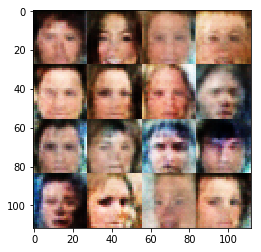

Epoch 0/1... Discriminator Loss: 1.0381... Generator Loss: 0.9470
Epoch 0/1... Discriminator Loss: 0.9946... Generator Loss: 1.0628
Epoch 0/1... Discriminator Loss: 1.0479... Generator Loss: 0.8899
Epoch 0/1... Discriminator Loss: 1.0945... Generator Loss: 1.1475
Epoch 0/1... Discriminator Loss: 0.9412... Generator Loss: 1.2125


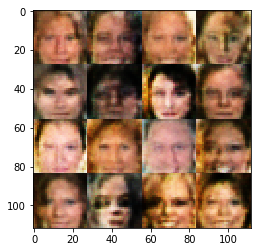

Epoch 0/1... Discriminator Loss: 1.1458... Generator Loss: 1.4341
Epoch 0/1... Discriminator Loss: 0.8752... Generator Loss: 1.6149
Epoch 0/1... Discriminator Loss: 1.1771... Generator Loss: 2.2521
Epoch 0/1... Discriminator Loss: 1.2821... Generator Loss: 0.7234
Epoch 0/1... Discriminator Loss: 1.0672... Generator Loss: 1.0496


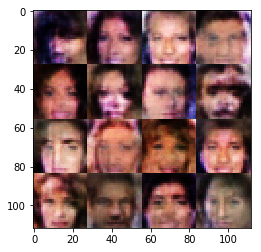

Epoch 0/1... Discriminator Loss: 1.1634... Generator Loss: 0.8926
Epoch 0/1... Discriminator Loss: 0.9774... Generator Loss: 1.0893
Epoch 0/1... Discriminator Loss: 1.0154... Generator Loss: 1.1629
Epoch 0/1... Discriminator Loss: 1.0323... Generator Loss: 0.9417
Epoch 0/1... Discriminator Loss: 1.1754... Generator Loss: 0.7006


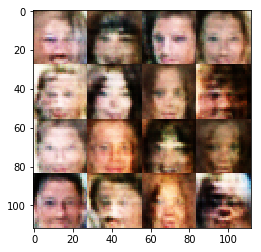

Epoch 0/1... Discriminator Loss: 0.9236... Generator Loss: 1.1914
Epoch 0/1... Discriminator Loss: 1.1126... Generator Loss: 1.3043
Epoch 0/1... Discriminator Loss: 0.9281... Generator Loss: 1.2119
Epoch 0/1... Discriminator Loss: 1.0787... Generator Loss: 1.2554
Epoch 0/1... Discriminator Loss: 0.8657... Generator Loss: 1.3266


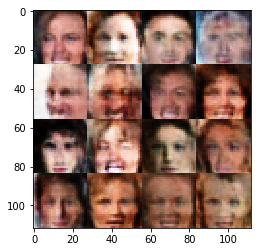

Epoch 0/1... Discriminator Loss: 1.0701... Generator Loss: 1.0756
Epoch 0/1... Discriminator Loss: 1.0287... Generator Loss: 1.4378
Epoch 0/1... Discriminator Loss: 0.9985... Generator Loss: 1.0728
Epoch 0/1... Discriminator Loss: 1.0363... Generator Loss: 1.4112
Epoch 0/1... Discriminator Loss: 1.1541... Generator Loss: 1.2513


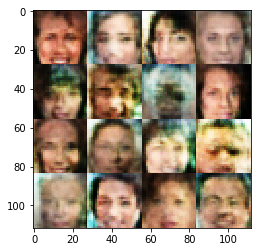

Epoch 0/1... Discriminator Loss: 0.9733... Generator Loss: 1.1820
Epoch 0/1... Discriminator Loss: 1.0060... Generator Loss: 1.1950
Epoch 0/1... Discriminator Loss: 1.1620... Generator Loss: 0.9899
Epoch 0/1... Discriminator Loss: 1.0888... Generator Loss: 1.1536
Epoch 0/1... Discriminator Loss: 1.2783... Generator Loss: 0.8218


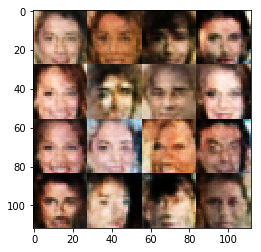

Epoch 0/1... Discriminator Loss: 1.0090... Generator Loss: 1.0193
Epoch 0/1... Discriminator Loss: 1.1099... Generator Loss: 1.0020
Epoch 0/1... Discriminator Loss: 1.1630... Generator Loss: 1.1551
Epoch 0/1... Discriminator Loss: 1.3038... Generator Loss: 0.6406
Epoch 0/1... Discriminator Loss: 1.0138... Generator Loss: 1.3461


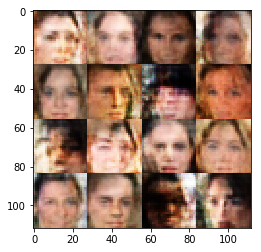

Epoch 0/1... Discriminator Loss: 1.0809... Generator Loss: 1.0359
Epoch 0/1... Discriminator Loss: 0.9121... Generator Loss: 1.2436
Epoch 0/1... Discriminator Loss: 1.0641... Generator Loss: 0.8820
Epoch 0/1... Discriminator Loss: 1.0228... Generator Loss: 1.0594
Epoch 0/1... Discriminator Loss: 1.1147... Generator Loss: 1.0104


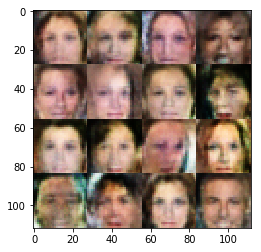

Epoch 0/1... Discriminator Loss: 0.9213... Generator Loss: 1.5990
Epoch 0/1... Discriminator Loss: 0.9502... Generator Loss: 1.4298
Epoch 0/1... Discriminator Loss: 1.0349... Generator Loss: 1.1149
Epoch 0/1... Discriminator Loss: 1.2605... Generator Loss: 0.7722
Epoch 0/1... Discriminator Loss: 1.0187... Generator Loss: 1.2566


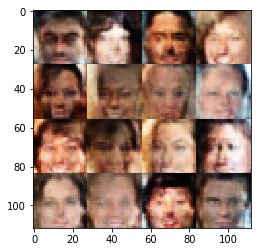

Epoch 0/1... Discriminator Loss: 0.9619... Generator Loss: 1.0937
Epoch 0/1... Discriminator Loss: 1.0488... Generator Loss: 1.3057
Epoch 0/1... Discriminator Loss: 1.0955... Generator Loss: 1.4220
Epoch 0/1... Discriminator Loss: 0.9749... Generator Loss: 1.2290
Epoch 0/1... Discriminator Loss: 0.8484... Generator Loss: 1.5533


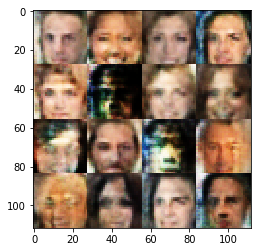

Epoch 0/1... Discriminator Loss: 1.1367... Generator Loss: 0.9749
Epoch 0/1... Discriminator Loss: 0.9416... Generator Loss: 1.6831
Epoch 0/1... Discriminator Loss: 0.8954... Generator Loss: 1.3091
Epoch 0/1... Discriminator Loss: 1.0052... Generator Loss: 1.0649
Epoch 0/1... Discriminator Loss: 1.0093... Generator Loss: 1.6255


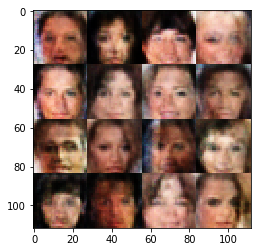

Epoch 0/1... Discriminator Loss: 1.1458... Generator Loss: 1.6368
Epoch 0/1... Discriminator Loss: 0.9147... Generator Loss: 1.0824
Epoch 0/1... Discriminator Loss: 1.1115... Generator Loss: 1.0859
Epoch 0/1... Discriminator Loss: 1.0635... Generator Loss: 1.2240
Epoch 0/1... Discriminator Loss: 0.9756... Generator Loss: 1.3491


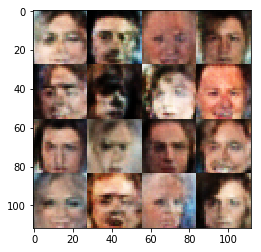

Epoch 0/1... Discriminator Loss: 0.9373... Generator Loss: 1.2981
Epoch 0/1... Discriminator Loss: 1.1060... Generator Loss: 0.9117
Epoch 0/1... Discriminator Loss: 1.1608... Generator Loss: 1.2850
Epoch 0/1... Discriminator Loss: 0.7817... Generator Loss: 1.5273
Epoch 0/1... Discriminator Loss: 1.1395... Generator Loss: 1.3368


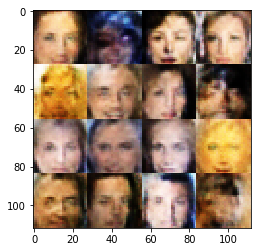

Epoch 0/1... Discriminator Loss: 1.3080... Generator Loss: 0.7481
Epoch 0/1... Discriminator Loss: 1.1044... Generator Loss: 0.9260
Epoch 0/1... Discriminator Loss: 1.1126... Generator Loss: 1.1530
Epoch 0/1... Discriminator Loss: 0.9345... Generator Loss: 1.2402
Epoch 0/1... Discriminator Loss: 1.0358... Generator Loss: 1.1884


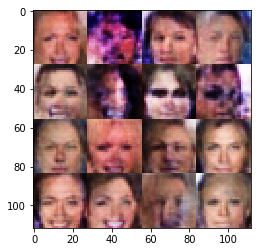

Epoch 0/1... Discriminator Loss: 1.2305... Generator Loss: 1.1347
Epoch 0/1... Discriminator Loss: 1.0078... Generator Loss: 1.2664
Epoch 0/1... Discriminator Loss: 0.8968... Generator Loss: 1.2384
Epoch 0/1... Discriminator Loss: 0.9800... Generator Loss: 1.0324
Epoch 0/1... Discriminator Loss: 0.9600... Generator Loss: 1.0230


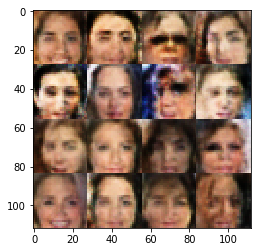

Epoch 0/1... Discriminator Loss: 1.1370... Generator Loss: 1.0913
Epoch 0/1... Discriminator Loss: 1.1277... Generator Loss: 1.0024
Epoch 0/1... Discriminator Loss: 1.0117... Generator Loss: 1.1102
Epoch 0/1... Discriminator Loss: 1.2583... Generator Loss: 0.6898
Epoch 0/1... Discriminator Loss: 0.9202... Generator Loss: 1.8829


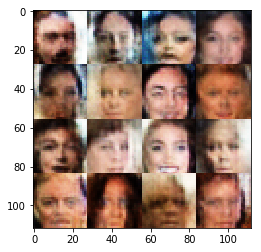

Epoch 0/1... Discriminator Loss: 1.1005... Generator Loss: 1.3139
Epoch 0/1... Discriminator Loss: 1.0437... Generator Loss: 0.9538
Epoch 0/1... Discriminator Loss: 0.9800... Generator Loss: 1.1740
Epoch 0/1... Discriminator Loss: 1.1069... Generator Loss: 0.8468
Epoch 0/1... Discriminator Loss: 0.9285... Generator Loss: 1.7236


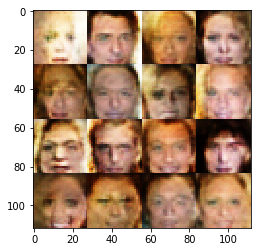

Epoch 0/1... Discriminator Loss: 1.1118... Generator Loss: 1.2397
Epoch 0/1... Discriminator Loss: 1.0150... Generator Loss: 1.1003
Epoch 0/1... Discriminator Loss: 1.1394... Generator Loss: 1.0070
Epoch 0/1... Discriminator Loss: 1.3270... Generator Loss: 0.8512
Epoch 0/1... Discriminator Loss: 1.2561... Generator Loss: 1.0676


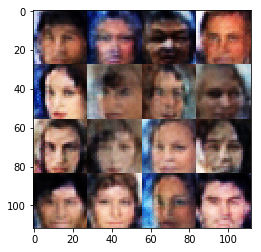

Epoch 0/1... Discriminator Loss: 0.9469... Generator Loss: 1.4028
Epoch 0/1... Discriminator Loss: 1.1090... Generator Loss: 1.1232
Epoch 0/1... Discriminator Loss: 1.0248... Generator Loss: 1.2274
Epoch 0/1... Discriminator Loss: 1.0119... Generator Loss: 1.6230
Epoch 0/1... Discriminator Loss: 0.8205... Generator Loss: 1.1400


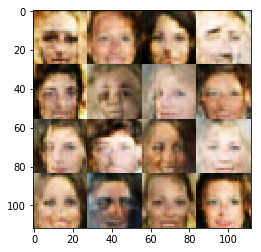

Epoch 0/1... Discriminator Loss: 1.4562... Generator Loss: 0.5058
Epoch 0/1... Discriminator Loss: 1.4467... Generator Loss: 1.1530
Epoch 0/1... Discriminator Loss: 1.2694... Generator Loss: 0.7003
Epoch 0/1... Discriminator Loss: 0.9636... Generator Loss: 1.3764
Epoch 0/1... Discriminator Loss: 0.9330... Generator Loss: 1.4664


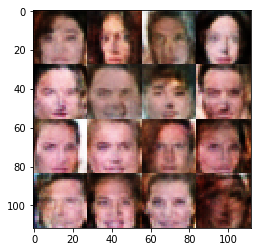

Epoch 0/1... Discriminator Loss: 1.0305... Generator Loss: 0.9541
Epoch 0/1... Discriminator Loss: 1.1922... Generator Loss: 0.7079


In [14]:
batch_size = 64
z_dim = 128
learning_rate = 0.0002    #Tried 0.001 previously, quality was not great.
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.